In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def muestreo(n, a, probabilidades):
    M = 100
    resultados = []
    for p in probabilidades:
    
        aceptados = 0
        muestra = np.random.binomial(n, p, size=50000)
    
        for i in range(len(muestra)):
              if muestra[i] <= a:
                    aceptados += 1
    
        P = aceptados / M
        resultados.append(P)

    return resultados

Text(0.5, 1.0, 'n= 5')

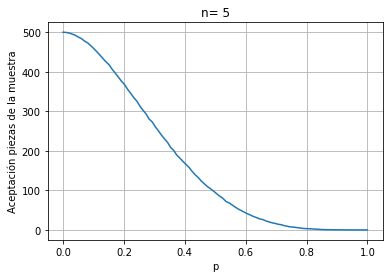

In [3]:
prob = np.linspace(0, 1, 100)
res= muestreo(5, 1,prob)
plt.plot(prob,res)
plt.grid()
plt.ylabel('Aceptación piezas de la muestra')
plt.xlabel('p')
plt.title('n= 5')

Text(0.5, 1.0, 'n= 25')

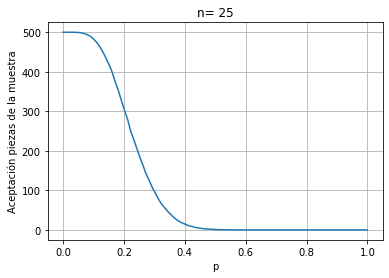

In [4]:
res2= muestreo(25,5,prob)
plt.plot(prob,res2)
plt.grid()
plt.ylabel('Aceptación piezas de la muestra')
plt.xlabel('p')
plt.title('n= 25')

a) Con proporción de piezas defectuosas menores a p=0.1 preferiría el plan de muestreo con n=5 y a=1, pues este presenta menor aceptación de las piezas para este rango de proporción, es decir, se tiene una mayor calidad de las piezas porque se aceptan menos lotes

b) Por otro lado, si fuese comprador y quisiera evitar aceptar lotes con fracción de piezas defectuosas mayor a p=0.3 se selecciona el plan con n=25, pues casí no acepta lotes con piezas defectuosas en proporciones mayores a p=0.3

In [5]:
# PARTE 2
# a)
l=1
objetivo=0.01
prob=1.
n=0
while prob > objetivo:
    n+=1
    prob=(np.exp(-l) * (l)**n )/ np.math.factorial(n)

print(n)
print(prob)

5
0.0030656620097620196


In [6]:
l=1
objetivo=0.01
prob=1.
desconexiones=np.random.poisson(l,10000)
probs=np.arange(1,101)
p=np.zeros(100)
for i in range(len(desconexiones)):
    for j in range(1,100):
        if desconexiones[i]==j:
            p[j-1]+=1
        
p/=10000
it=0
for i in p:
    it+=1
    if i<objetivo:
        print('menor valor de n: '+str(it))
        print('probabilidad: '+str(i))
        break

menor valor de n: 5
probabilidad: 0.003


In [7]:
# b)
tasa=0.25
objetivo=0.02
tiempo=1.
n=0
while prob > objetivo:
    prob=(np.exp(-tasa*tiempo) * (tasa*tiempo)**0 )/ np.math.factorial(0)
    tiempo+=1

print(tiempo)
print(prob)

17.0
0.01831563888873418


In [8]:
tiempo=1.
prob=1.
while prob>objetivo:
    desconexiones=np.random.poisson(tasa*tiempo,10000)
    tiempo+=1
    cumplen=desconexiones[~(desconexiones>0)]
    prob=len(cumplen)/10000

print('Menor número de horas: '+str(tiempo))

Menor número de horas: 17.0


In [12]:
# C)
#Que haya solo uno sin desconexiones implica que los otros tengan desconexiones
tiempo=4.
prob=1.
prob_no_desc=(np.exp(-tasa*tiempo) * (tasa*tiempo)**0 )/ np.math.factorial(0)
prob_evento=((1-prob_no_desc)**2)*prob_no_desc
print(prob_evento)


0.14699594306608088


In [38]:
tiempo=4.
prob=np.zeros(3)
for i in range(3):
    desconexiones=np.random.poisson(tasa*tiempo,1000000)
    cumplen=desconexiones[~(desconexiones>0)]
    prob[i]=len(cumplen)/1000000

#np.random.shuffle(prob)
prob_evento=prob[0]*(1-prob[1])*(1-prob[2])
prob_evento

0.14702011531653533

In [39]:
# D)
#El valor esperado es la tasa Lambda en ese periodo de horas, o sea, una desconexión
tiempo=4.
prob_1desc=(np.exp(-tasa*tiempo) * (tasa*tiempo)**1 )/ np.math.factorial(1)
prob_evento=(prob_1desc)**3
print(prob_evento)

0.04978706836786395


In [48]:
prob=np.zeros(3)
for i in range(3):
    desconexiones=np.random.poisson(tasa*tiempo,1000000)
    cumplen=desconexiones[(desconexiones ==1)]
    prob[i]=len(cumplen)/1000000

#np.random.shuffle(prob)
prob_evento=(prob[0])*(prob[1])*(prob[2])
prob_evento

0.04978968598444895